In [ ]:
'''Objective: Build a model to predict the band gap of a material based on what element it is,
            its position in space, and its lattice information, using regression based machine learning'''



'''Future Version goal: to improve the accuracy predicted by the model'''

In [24]:
#Call data

from aflow import *

result = search(batch_size=200
        ).filter(K.Egap > 1
        ).filter(K.nspecies == 2
        ).filter(K.natoms == 2)


#print(result[7].Egap)
#part = result[0:1000]

len(result)
#print(result[0].species)
#for entry in result:
    #print(entry.Egap)

827

In [90]:
#make data right type/shape

#make X1 from atomic name to atomic number
from mendeleev import element
import numpy as np

at_num1 = []
at_num2 = []

for i in result[0:826]:
    ele1 = (i.species[0])
    #z= ele1.replace('\n','')
    number1= element(ele1).atomic_number
    #print(number1)
    at_num1.append(number1)
    
    ele2 = (i.species[1])
    z2= ele2.replace('\n','')
    number2= element(z2).atomic_number
    #print(number2)
    at_num2.append(number2)
    
    
#print(at_num1)

x1= np.hstack((at_num1, at_num2)).reshape(826,2)
#x1= np.asarray(at_num).reshape(-1,1)
print(x1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledx1 = scaler.fit_transform(x1)
print(rescaledx1)

[[ 1 25]
 [ 8 47]
 [ 8 35]
 ...
 [ 3  3]
 [ 3  3]
 [ 3  3]]
[[0.     0.3   ]
 [0.0875 0.575 ]
 [0.0875 0.425 ]
 ...
 [0.025  0.025 ]
 [0.025  0.025 ]
 [0.025  0.025 ]]


C:\Users\Katie\Miniconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [50]:
import numpy as np
pos=[]
for entry in result[0:826]:
    x2= entry.positions_fractional
    pos.append(x2)

#print(pos)

X2= np.asarray(pos).reshape(826,6)

print(X2)

[[ 0.5   0.5   0.5   0.    0.    0.  ]
 [ 0.    0.    0.    0.75  0.75  0.75]
 [ 0.5   0.5   0.5  -0.   -0.   -0.  ]
 ...
 [ 0.5   0.5   0.5   0.    0.    0.  ]
 [ 0.    0.    0.    0.5   0.5   0.5 ]
 [ 0.5   0.5   0.5   0.    0.    0.  ]]


In [29]:

geo=[]

for entry in result[0:826]:
    #x2= entry.positions_fractional
    #X2.append(x2)
    
    x3= entry.geometry
    #print(X3)
    geo.append(x3)
    
#print(geo)


x3=np.asarray(geo).reshape(826,6)

print(x3)

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledx3 = scaler.fit_transform(x3)
print(rescaledx3)

[[ 2.940905  2.940905  2.940905 90.       90.       90.      ]
 [ 4.585472  4.585472  4.585472 60.       60.       60.      ]
 [ 3.443548  3.443548  3.443548 60.       60.       60.      ]
 ...
 [ 2.884276  2.884276  2.884276 60.       60.       60.      ]
 [ 2.884268  2.884268  2.884268 60.       60.       60.      ]
 [ 2.884226  2.884226  2.884226 60.       60.       60.      ]]
[[0.12679584 0.12679584 0.12679584 0.499134   0.57502528 0.57650149]
 [0.67664502 0.67664502 0.67664502 0.         0.15152012 0.15300721]
 [0.29485092 0.29485092 0.29485092 0.         0.15152012 0.15300721]
 ...
 [0.10786234 0.10786234 0.10786234 0.         0.15152012 0.15300721]
 [0.10785966 0.10785966 0.10785966 0.         0.15152012 0.15300721]
 [0.10784562 0.10784562 0.10784562 0.         0.15152012 0.15300721]]


In [51]:
X= np.hstack((rescaledx3, X2, rescaledx1))


X.shape
#print(X)

(826, 14)

In [36]:
y=[]
for entry in result[0:826]:
    BG= entry.Egap
    y.append(BG)
    
Y=np.asarray(y).reshape(826,1)

print(Y)

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledY = scaler.fit_transform(Y)

print(rescaledY)

[[1.0365]
 [1.0463]
 [1.0551]
 [1.0812]
 [1.0945]
 [1.133 ]
 [1.1335]
 [1.1368]
 [1.1369]
 [1.1373]
 [1.1386]
 [1.1404]
 [1.1441]
 [1.1454]
 [1.146 ]
 [1.1474]
 [1.1708]
 [1.1859]
 [1.1871]
 [1.1883]
 [1.1883]
 [1.1883]
 [1.1886]
 [1.1886]
 [1.1886]
 [1.1887]
 [1.1888]
 [1.1889]
 [1.1895]
 [1.1898]
 [1.2008]
 [1.202 ]
 [1.202 ]
 [1.2021]
 [1.2022]
 [1.2122]
 [1.2271]
 [1.2271]
 [1.2272]
 [1.2272]
 [1.2272]
 [1.2272]
 [1.2272]
 [1.2272]
 [1.2272]
 [1.2283]
 [1.2373]
 [1.2373]
 [1.2471]
 [1.2475]
 [1.2475]
 [1.2476]
 [1.248 ]
 [1.2498]
 [1.2711]
 [1.2785]
 [1.2805]
 [1.2828]
 [1.283 ]
 [1.283 ]
 [1.2874]
 [1.3182]
 [1.3191]
 [1.3216]
 [1.3277]
 [1.3282]
 [1.3304]
 [1.3397]
 [1.3704]
 [1.3704]
 [1.3705]
 [1.3705]
 [1.3705]
 [1.3705]
 [1.3705]
 [1.3706]
 [1.3707]
 [1.3709]
 [1.4329]
 [1.4375]
 [1.4375]
 [1.4666]
 [1.467 ]
 [1.4673]
 [1.4673]
 [1.4684]
 [1.4685]
 [1.4728]
 [1.4738]
 [1.474 ]
 [1.4743]
 [1.4745]
 [1.4761]
 [1.4763]
 [1.4763]
 [1.4766]
 [1.4769]
 [1.4772]
 [1.4774]
 [1.4774]


In [89]:
print(X)


[[ 0.12679584  0.12679584  0.12679584 ...  0.          0.
   0.3       ]
 [ 0.67664502  0.67664502  0.67664502 ...  0.75        0.0875
   0.575     ]
 [ 0.29485092  0.29485092  0.29485092 ... -0.          0.0875
   0.425     ]
 ...
 [ 0.10786234  0.10786234  0.10786234 ...  0.          0.025
   0.025     ]
 [ 0.10785966  0.10785966  0.10785966 ...  0.5         0.025
   0.025     ]
 [ 0.10784562  0.10784562  0.10784562 ...  0.          0.025
   0.025     ]]


In [53]:
#Split the data

from sklearn.cross_validation import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, rescaledY, random_state=10)

len(X_test)

207

In [54]:
#implement KNeighborsRegressor---choose estimator

from sklearn.neighbors import KNeighborsRegressor
estimator = KNeighborsRegressor(4, weights='distance', algorithm='kd_tree', leaf_size=3000,)

In [71]:
#train data

import numpy as np
import matplotlib.pyplot as plt

estimator.fit(X_train,  Y_train)
y_predicted = estimator.predict(X_test)



#print(Y_test)
#print(y_predicted)



In [91]:
r2= estimator.score( X_test, Y_test, sample_weight=None)


print('r^2 = ', r2)
#dir(KNeighborsRegressor)

r^2 =  0.7082364521282861


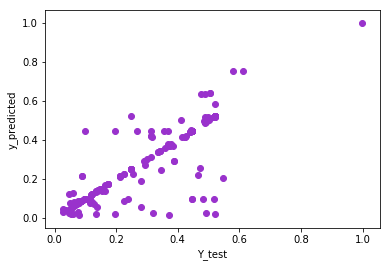

In [81]:
plt.scatter( y_predicted, Y_test, c='darkorchid')
plt.xlabel('Y_test')
plt.ylabel('y_predicted')
plt.show()



#plot ypredicted vs ytest on x axis

#read about pearson coefficients like r value